# Afrobeats Recommender

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances, cosine_distances, cosine_similarity
from sklearn.decomposition import PCA

from scipy import sparse
import plotly.express as px
import time

#### Import Jack's Playlist

In [2]:
jack= pd.read_csv('../data/jack.csv')
jack.head(2)

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,1YzcrcgR3T2RwAZg5tSvYP,Die Walküre / Erster Aufzug: Orchestervorspiel,Richard Wagner,1C1x4MVkql8AiABuTw6DgE,Solti - Wagner - The Operas,17,0.265,0.2830,2,-19.457,...,0.1640,113.033,audio_features,1YzcrcgR3T2RwAZg5tSvYP,spotify:track:1YzcrcgR3T2RwAZg5tSvYP,https://api.spotify.com/v1/tracks/1YzcrcgR3T2R...,https://api.spotify.com/v1/audio-analysis/1Yzc...,196000,3,jack
1,6JmduA0I9QYtD1RiHQgWjj,"Götterdämmerung, WWV 86D, Act III: Siegfrieds ...",Richard Wagner,1C1x4MVkql8AiABuTw6DgE,"Wagner: Götterdämmerung, WWV 86D",5,0.117,0.0495,5,-20.410,...,0.0396,66.858,audio_features,6JmduA0I9QYtD1RiHQgWjj,spotify:track:6JmduA0I9QYtD1RiHQgWjj,https://api.spotify.com/v1/tracks/6JmduA0I9QYt...,https://api.spotify.com/v1/audio-analysis/6Jmd...,409787,3,jack


In [3]:
jack.shape

(13, 25)

In [4]:
afrobeats = pd.read_csv('../data/afrobeats.csv')
afrobeats.head(2)

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,1sSt1DqqqFLkPwfrqafVyn,Oleku (feat. Brymo),51,0.544,0.730,1,-4.299,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364,5,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,37zb1JQnDV9dRLatrASEj1,Move Back,45,0.793,0.734,11,-9.252,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107,4,afrobeats


In [5]:
afrobeats.shape

(1500, 25)

In [6]:
df = pd.concat([afrobeats, jack])

In [7]:
df.reset_index(inplace=True, drop=True)

In [8]:
df.head()

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre
0,0mDRuZmReEm6DquPLJlcEm,Oleku (feat. Brymo),Ice Prince,1sSt1DqqqFLkPwfrqafVyn,Oleku (feat. Brymo),51,0.544,0.730,1,-4.299,...,0.751,162.112,audio_features,0mDRuZmReEm6DquPLJlcEm,spotify:track:0mDRuZmReEm6DquPLJlcEm,https://api.spotify.com/v1/tracks/0mDRuZmReEm6...,https://api.spotify.com/v1/audio-analysis/0mDR...,291364,5,afrobeats
1,1tvi8tv0eykhNcV1WtaIqO,Move Back,5five,37zb1JQnDV9dRLatrASEj1,Move Back,45,0.793,0.734,11,-9.252,...,0.793,125.032,audio_features,1tvi8tv0eykhNcV1WtaIqO,spotify:track:1tvi8tv0eykhNcV1WtaIqO,https://api.spotify.com/v1/tracks/1tvi8tv0eykh...,https://api.spotify.com/v1/audio-analysis/1tvi...,237107,4,afrobeats
2,5YgyvTZmdkIfFOnj8ri8mZ,Pakurumo,WizKid,3tVQdUvClmAT7URs9V3rsp,Superstar,49,0.879,0.737,2,-5.412,...,0.967,119.990,audio_features,5YgyvTZmdkIfFOnj8ri8mZ,spotify:track:5YgyvTZmdkIfFOnj8ri8mZ,https://api.spotify.com/v1/tracks/5YgyvTZmdkIf...,https://api.spotify.com/v1/audio-analysis/5Ygy...,212006,4,afrobeats
3,2cWdhA4ZDBvYuHRKKIPT3k,The Matter (feat. Wizkid),Maleek Berry,520qA5VGL9iI0SbmEnTVNg,The Matter (feat. Wizkid),49,0.697,0.841,2,-6.782,...,0.808,103.070,audio_features,2cWdhA4ZDBvYuHRKKIPT3k,spotify:track:2cWdhA4ZDBvYuHRKKIPT3k,https://api.spotify.com/v1/tracks/2cWdhA4ZDBvY...,https://api.spotify.com/v1/audio-analysis/2cWd...,198058,4,afrobeats
4,4voOsb8qpJ569JaMiGAyrl,Slow Down (feat. Wiz Kid),R2Bees,0LFsP7WPfu5inz9a1amcE4,Refuse to Be Broke: Da Revolution 2,53,0.520,0.717,6,-3.006,...,0.704,135.550,audio_features,4voOsb8qpJ569JaMiGAyrl,spotify:track:4voOsb8qpJ569JaMiGAyrl,https://api.spotify.com/v1/tracks/4voOsb8qpJ56...,https://api.spotify.com/v1/audio-analysis/4voO...,261547,5,afrobeats


In [9]:
features = ['danceability','energy','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

#### Quick clustering to see how the different genres seperate out 

In [10]:
X = df[features]

In [11]:
pipeline = Pipeline([
                    ('scaler', StandardScaler()), 
                    ('kmeans', KMeans(n_clusters=10))
])

pipeline.fit(X)
df['cluster'] = pipeline.predict(X)

#### Using PCA reduce the features into 2 dimentions for better visualization

In [12]:
pipeline_pca = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])

In [13]:
pipeline_pca.fit(X)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2))])

In [14]:
pca_df=pd.DataFrame(pipeline_pca.transform(X), columns=['x','y'])

In [15]:
pca_df['cluster'] = df['cluster']
pca_df['genre'] = df['genre']

<AxesSubplot:xlabel='x', ylabel='y'>

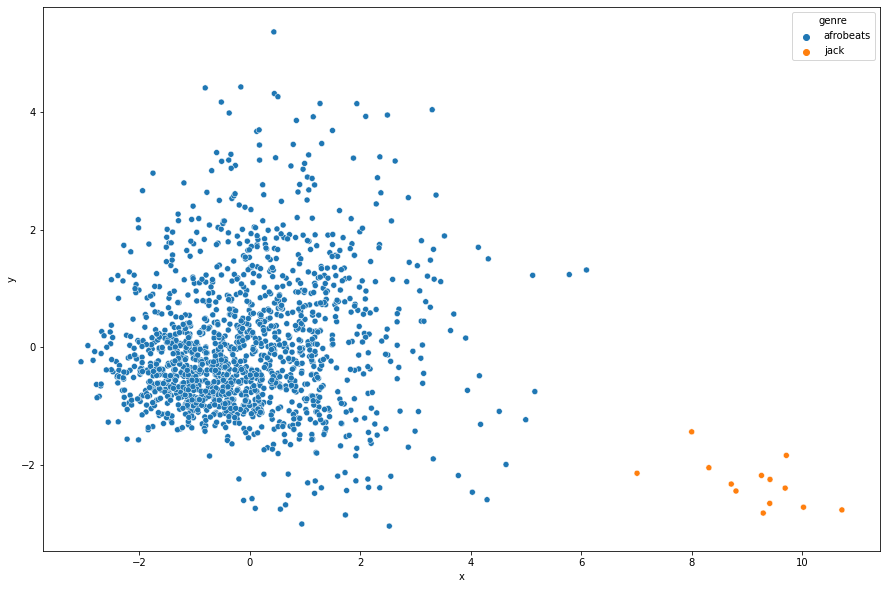

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=pca_df['x'], y=pca_df['y'], hue=pca_df['genre'])

In [17]:
pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('tsne', TSNE(n_components=2, verbose=False))
])
X_tnse = pipeline.fit_transform(X)


tsne_df = pd.DataFrame(columns=['x', 'y'], data=X_tnse)
tsne_df['genre'] = df['genre']
tsne_df['cluster'] = df['cluster']
tsne_df['track_name'] = df['track_name']

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [18]:
tsne_df.head()

,x,y,genre,cluster,track_name
0,-10.356689,-5.434772,afrobeats,0,Oleku (feat. Brymo)
1,-28.987198,10.187572,afrobeats,6,Move Back
2,-17.615942,-29.183474,afrobeats,8,Pakurumo
3,-20.886801,-26.300205,afrobeats,6,The Matter (feat. Wizkid)
4,0.606339,1.713246,afrobeats,9,Slow Down (feat. Wiz Kid)


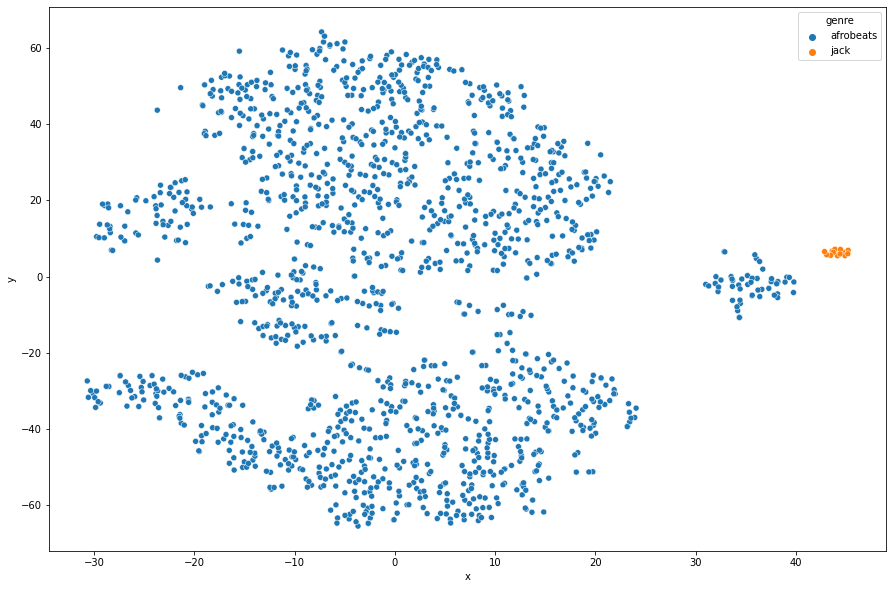

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot( x=tsne_df['x'], y=tsne_df['y'], hue=tsne_df['genre']);

## Cosine similarity

In [20]:
X.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.544,0.730,-4.299,0,0.1440,0.344,0.000001,0.140,0.751,162.112
1,0.793,0.734,-9.252,0,0.0981,0.323,0.000002,0.777,0.793,125.032
2,0.879,0.737,-5.412,1,0.0421,0.525,0.005760,0.268,0.967,119.990
3,0.697,0.841,-6.782,1,0.2710,0.224,0.000000,0.336,0.808,103.070
4,0.520,0.717,-3.006,0,0.3890,0.116,0.000000,0.249,0.704,135.550


In [21]:
similarities = cosine_similarity(X)

In [22]:
similarities

array([[1.        , 0.99885823, 0.99977449, ..., 0.98062907, 0.98628217,
        0.97206848],
       [0.99885823, 1.        , 0.99953946, ..., 0.98874936, 0.9929474 ,
        0.98202104],
       [0.99977449, 0.99953946, 1.        , ..., 0.98411871, 0.98912955,
        0.97630926],
       ...,
       [0.98062907, 0.98874936, 0.98411871, ..., 1.        , 0.99944682,
        0.99920585],
       [0.98628217, 0.9929474 , 0.98912955, ..., 0.99944682, 1.        ,
        0.99739915],
       [0.97206848, 0.98202104, 0.97630926, ..., 0.99920585, 0.99739915,
        1.        ]])

#### Create a dataframe of similarities


I will drop rows of data from the playlist we are using to get recommendations 

In [23]:
recommender_df = pd.DataFrame(similarities,
                              columns=df['track_name'],
                             index=df['track_name']).drop(jack['track_name'])

In [24]:
recommender_df

track_name,Oleku (feat. Brymo),Move Back,Pakurumo,The Matter (feat. Wizkid),Slow Down (feat. Wiz Kid),Like to Party,Yahooze,Bumper To Bumper,Dami Duro,Gongo Aso,...,"Götterdämmerung, WWV 86D, Prologue: Siegfrieds Rheinfahrt","Piano Concerto No. 1 in D Minor, Op. 15: I. Maestoso - Poco più moderato",Symphony No. 1: IV. Stürmisch bewegt,"Symphony No.9 in E Minor, Op.95, B.178: 1. Adagio - Allegro molto","Symphony No.9 in E Minor, Op.95, B.178: 4. Allegro con fuoco","Mahler: Symphony No. 2 in C Minor ""Resurrection"": I. Allegro maestoso. Mit durchaus ernstem und feierlichem Ausdruck","Symphony No. 4 in C Minor, Op. 43: III. Largo - Allegro","Symphony No. 4 in E-Flat Major, WAB 104, ""Romantic"": III. Scherzo - Live",Messa da Requiem: 2a. Dies irae,"Der Freischütz, J. 277: Overture"
track_name,,,,,,,,,,,,,,,,,,,,,
Oleku (feat. Brymo),1.000000,0.998858,0.999774,0.999164,0.999987,0.999251,0.999216,0.998757,0.999778,0.999933,...,0.992444,0.984786,0.986739,0.992238,0.997835,0.980065,0.991348,0.980629,0.986282,0.972068
Move Back,0.998858,1.000000,0.999539,0.999910,0.998647,0.999889,0.999903,0.999984,0.997677,0.998740,...,0.997075,0.991849,0.993258,0.996950,0.999762,0.988317,0.996392,0.988749,0.992947,0.982021
Pakurumo,0.999774,0.999539,1.000000,0.999779,0.999683,0.999807,0.999798,0.999463,0.999186,0.999790,...,0.994536,0.987774,0.989592,0.994308,0.998803,0.983514,0.993591,0.984119,0.989130,0.976309
The Matter (feat. Wizkid),0.999164,0.999910,0.999779,1.000000,0.998992,0.999990,0.999992,0.999883,0.998159,0.999162,...,0.996439,0.990719,0.992315,0.996225,0.999519,0.986980,0.995676,0.987537,0.991898,0.980527
Slow Down (feat. Wiz Kid),0.999987,0.998647,0.999683,0.998992,1.000000,0.999085,0.999044,0.998533,0.999862,0.999933,...,0.991888,0.984004,0.986013,0.991674,0.997527,0.979176,0.990756,0.979757,0.985541,0.971025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vex Oh (feat. Eight9FLY),0.997875,0.999796,0.998938,0.999675,0.997592,0.999632,0.999653,0.999840,0.996341,0.997812,...,0.998232,0.993813,0.995099,0.998054,0.999879,0.990715,0.997695,0.991174,0.994763,0.985141
God's Work (feat. iLL BLU),0.999856,0.999491,0.999955,0.999679,0.999781,0.999721,0.999711,0.999423,0.999325,0.999800,...,0.994228,0.987391,0.989156,0.994050,0.998708,0.983068,0.993271,0.983587,0.988768,0.975647
JA ARA E,0.999259,0.999853,0.999832,0.999985,0.999099,0.999981,0.999992,0.999825,0.998319,0.999285,...,0.996152,0.990260,0.991901,0.995917,0.999403,0.986445,0.995363,0.987018,0.991466,0.979889


#### Create a function to predict top ten Afrobeats songs based on the playlist given

In [25]:
recommender_df['Die Walküre / Erster Aufzug: Orchestervorspiel'].sort_values(ascending=False).index[0:10]

Index(['Do Not Disturb', 'Tuachane', 'Wait For You (feat. Oxlade)', 'Ojoro',
       'Baby Mi', 'Bad Influence', 'Hello Brother', 'Hold On', 'Salvation',
       'Lon'so'],
      dtype='object', name='track_name')

In [26]:
df[df['track_name']=='Die Walküre / Erster Aufzug: Orchestervorspiel']

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
1500,1YzcrcgR3T2RwAZg5tSvYP,Die Walküre / Erster Aufzug: Orchestervorspiel,Richard Wagner,1C1x4MVkql8AiABuTw6DgE,Solti - Wagner - The Operas,17,0.265,0.283,2,-19.457,...,113.033,audio_features,1YzcrcgR3T2RwAZg5tSvYP,spotify:track:1YzcrcgR3T2RwAZg5tSvYP,https://api.spotify.com/v1/tracks/1YzcrcgR3T2R...,https://api.spotify.com/v1/audio-analysis/1Yzc...,196000,3,jack,5


In [32]:
def recommend_(track_names):
    top_ten_df = pd.DataFrame(columns=df.columns)
    top_ten_list = []
    
    for track in track_names:
        most_similar = recommender_df[track].sort_values(ascending=False).index[0]
        top_ten_list.append(most_similar)
        
        top_ten_df = pd.concat([top_ten_df, df[df['track_name']==most_similar]])
        
    return top_ten_df

In [33]:
recommend_(jack['track_name'])

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
751,6wj7t9nuC70oPgZ4H1J2hA,Do Not Disturb,Omah Lay,5yOvAmpIR7hVxiS6Ls5DPO,Do Not Disturb,54,0.722,0.221,2,-16.489,...,97.297,audio_features,6wj7t9nuC70oPgZ4H1J2hA,spotify:track:6wj7t9nuC70oPgZ4H1J2hA,https://api.spotify.com/v1/tracks/6wj7t9nuC70o...,https://api.spotify.com/v1/audio-analysis/6wj7...,222720,4,afrobeats,3
700,22J1ZWNO3vwKf49JKBd2pG,Missed Call,Mike Keyz,5F7e9W2BhWJ4kCgeM5Czzp,Missed Call,26,0.724,0.19,0,-21.272,...,96.021,audio_features,22J1ZWNO3vwKf49JKBd2pG,spotify:track:22J1ZWNO3vwKf49JKBd2pG,https://api.spotify.com/v1/tracks/22J1ZWNO3vwK...,https://api.spotify.com/v1/audio-analysis/22J1...,222500,4,afrobeats,3
512,6yprUAj991lNqvnbVmR34N,Baby Mi,Djwalz,1kkriY46YLjIu947a90gb2,Baby Mi,8,0.84,0.255,5,-18.132,...,95.0,audio_features,6yprUAj991lNqvnbVmR34N,spotify:track:6yprUAj991lNqvnbVmR34N,https://api.spotify.com/v1/tracks/6yprUAj991lN...,https://api.spotify.com/v1/audio-analysis/6ypr...,164989,4,afrobeats,3
550,1djCgiQcqe5JnZS61KYNpD,Level Up (Twice As Tall) [feat. Youssou N'Dour],Burna Boy,3wcj11K77LjEY1PkEazffa,Twice As Tall,49,0.518,0.326,0,-12.628,...,85.928,audio_features,1djCgiQcqe5JnZS61KYNpD,spotify:track:1djCgiQcqe5JnZS61KYNpD,https://api.spotify.com/v1/tracks/1djCgiQcqe5J...,https://api.spotify.com/v1/audio-analysis/1djC...,268760,4,afrobeats,3
512,6yprUAj991lNqvnbVmR34N,Baby Mi,Djwalz,1kkriY46YLjIu947a90gb2,Baby Mi,8,0.84,0.255,5,-18.132,...,95.0,audio_features,6yprUAj991lNqvnbVmR34N,spotify:track:6yprUAj991lNqvnbVmR34N,https://api.spotify.com/v1/tracks/6yprUAj991lN...,https://api.spotify.com/v1/audio-analysis/6ypr...,164989,4,afrobeats,3
883,2MboJofvM4ERzJ9uPtRyaT,Ojoro,Oxlade,3WTrdbZU99dgTtt3ZkyamT,Ojoro,20,0.443,0.174,3,-17.563,...,95.201,audio_features,2MboJofvM4ERzJ9uPtRyaT,spotify:track:2MboJofvM4ERzJ9uPtRyaT,https://api.spotify.com/v1/tracks/2MboJofvM4ER...,https://api.spotify.com/v1/audio-analysis/2Mbo...,213943,4,afrobeats,3
1363,7HM3WyOHG3Nm6Ck5aZaFKF,Ojoro,Terri,6h3iqdnfBKV2jRhUJz0oto,Ojoro,52,0.865,0.801,6,-4.665,...,109.978,audio_features,7HM3WyOHG3Nm6Ck5aZaFKF,spotify:track:7HM3WyOHG3Nm6Ck5aZaFKF,https://api.spotify.com/v1/tracks/7HM3WyOHG3Nm...,https://api.spotify.com/v1/audio-analysis/7HM3...,192000,4,afrobeats,1
752,0xXqVYGvFCGFeFwPzwix3V,Hello Brother,Omah Lay,5yOvAmpIR7hVxiS6Ls5DPO,Hello Brother,48,0.656,0.195,6,-14.247,...,95.863,audio_features,0xXqVYGvFCGFeFwPzwix3V,spotify:track:0xXqVYGvFCGFeFwPzwix3V,https://api.spotify.com/v1/tracks/0xXqVYGvFCGF...,https://api.spotify.com/v1/audio-analysis/0xXq...,170031,4,afrobeats,3
908,3aOVK8gQWtE6syUPbLcz9B,Broken Parts,BenjiFlow,3NRpcByltnHx7oZxWbg8Lt,BENERGY,16,0.235,0.316,6,-16.548,...,176.007,audio_features,3aOVK8gQWtE6syUPbLcz9B,spotify:track:3aOVK8gQWtE6syUPbLcz9B,https://api.spotify.com/v1/tracks/3aOVK8gQWtE6...,https://api.spotify.com/v1/audio-analysis/3aOV...,182000,4,afrobeats,3
700,22J1ZWNO3vwKf49JKBd2pG,Missed Call,Mike Keyz,5F7e9W2BhWJ4kCgeM5Czzp,Missed Call,26,0.724,0.19,0,-21.272,...,96.021,audio_features,22J1ZWNO3vwKf49JKBd2pG,spotify:track:22J1ZWNO3vwKf49JKBd2pG,https://api.spotify.com/v1/tracks/22J1ZWNO3vwK...,https://api.spotify.com/v1/audio-analysis/22J1...,222500,4,afrobeats,3


In [34]:
def recommend_afrobeats(track_names):
    top_ten_df = pd.DataFrame(columns=df.columns)
    top_ten_list = []
    
    #Get song from users playlis
    for track in track_names:
        
        
        for count in range(len(df)): 
            most_similar = recommender_df[track].sort_values(ascending=False).index[count]
            
            #check if song has already been recommended
            if most_similar in top_ten_list:
                continue
            
            else:
                top_ten_list.append(most_similar)
                break
                
        #create a dataframe of the recommended songs
        top_ten_df = pd.concat([top_ten_df, df[df['track_name']==most_similar]])
        
    return top_ten_df

In [35]:
recommend_afrobeats(jack['track_name'])

,track_uri,track_name,artist_name,artist_uri,album,track_pop,danceability,energy,key,loudness,...,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,cluster
751,6wj7t9nuC70oPgZ4H1J2hA,Do Not Disturb,Omah Lay,5yOvAmpIR7hVxiS6Ls5DPO,Do Not Disturb,54,0.722,0.221,2,-16.489,...,97.297,audio_features,6wj7t9nuC70oPgZ4H1J2hA,spotify:track:6wj7t9nuC70oPgZ4H1J2hA,https://api.spotify.com/v1/tracks/6wj7t9nuC70o...,https://api.spotify.com/v1/audio-analysis/6wj7...,222720,4,afrobeats,3
700,22J1ZWNO3vwKf49JKBd2pG,Missed Call,Mike Keyz,5F7e9W2BhWJ4kCgeM5Czzp,Missed Call,26,0.724,0.19,0,-21.272,...,96.021,audio_features,22J1ZWNO3vwKf49JKBd2pG,spotify:track:22J1ZWNO3vwKf49JKBd2pG,https://api.spotify.com/v1/tracks/22J1ZWNO3vwK...,https://api.spotify.com/v1/audio-analysis/22J1...,222500,4,afrobeats,3
512,6yprUAj991lNqvnbVmR34N,Baby Mi,Djwalz,1kkriY46YLjIu947a90gb2,Baby Mi,8,0.84,0.255,5,-18.132,...,95.0,audio_features,6yprUAj991lNqvnbVmR34N,spotify:track:6yprUAj991lNqvnbVmR34N,https://api.spotify.com/v1/tracks/6yprUAj991lN...,https://api.spotify.com/v1/audio-analysis/6ypr...,164989,4,afrobeats,3
550,1djCgiQcqe5JnZS61KYNpD,Level Up (Twice As Tall) [feat. Youssou N'Dour],Burna Boy,3wcj11K77LjEY1PkEazffa,Twice As Tall,49,0.518,0.326,0,-12.628,...,85.928,audio_features,1djCgiQcqe5JnZS61KYNpD,spotify:track:1djCgiQcqe5JnZS61KYNpD,https://api.spotify.com/v1/tracks/1djCgiQcqe5J...,https://api.spotify.com/v1/audio-analysis/1djC...,268760,4,afrobeats,3
883,2MboJofvM4ERzJ9uPtRyaT,Ojoro,Oxlade,3WTrdbZU99dgTtt3ZkyamT,Ojoro,20,0.443,0.174,3,-17.563,...,95.201,audio_features,2MboJofvM4ERzJ9uPtRyaT,spotify:track:2MboJofvM4ERzJ9uPtRyaT,https://api.spotify.com/v1/tracks/2MboJofvM4ER...,https://api.spotify.com/v1/audio-analysis/2Mbo...,213943,4,afrobeats,3
1363,7HM3WyOHG3Nm6Ck5aZaFKF,Ojoro,Terri,6h3iqdnfBKV2jRhUJz0oto,Ojoro,52,0.865,0.801,6,-4.665,...,109.978,audio_features,7HM3WyOHG3Nm6Ck5aZaFKF,spotify:track:7HM3WyOHG3Nm6Ck5aZaFKF,https://api.spotify.com/v1/tracks/7HM3WyOHG3Nm...,https://api.spotify.com/v1/audio-analysis/7HM3...,192000,4,afrobeats,1
950,1OgoSHtTZyMJt3ns3e5Lui,Wait For You (feat. Oxlade),melvitto,4Xj0nxVO4r7PLEaw7LRiBa,THENIGHTISYOUNG.,65,0.6,0.204,8,-11.169,...,61.565,audio_features,1OgoSHtTZyMJt3ns3e5Lui,spotify:track:1OgoSHtTZyMJt3ns3e5Lui,https://api.spotify.com/v1/tracks/1OgoSHtTZyMJ...,https://api.spotify.com/v1/audio-analysis/1Ogo...,254315,4,afrobeats,3
752,0xXqVYGvFCGFeFwPzwix3V,Hello Brother,Omah Lay,5yOvAmpIR7hVxiS6Ls5DPO,Hello Brother,48,0.656,0.195,6,-14.247,...,95.863,audio_features,0xXqVYGvFCGFeFwPzwix3V,spotify:track:0xXqVYGvFCGFeFwPzwix3V,https://api.spotify.com/v1/tracks/0xXqVYGvFCGF...,https://api.spotify.com/v1/audio-analysis/0xXq...,170031,4,afrobeats,3
908,3aOVK8gQWtE6syUPbLcz9B,Broken Parts,BenjiFlow,3NRpcByltnHx7oZxWbg8Lt,BENERGY,16,0.235,0.316,6,-16.548,...,176.007,audio_features,3aOVK8gQWtE6syUPbLcz9B,spotify:track:3aOVK8gQWtE6syUPbLcz9B,https://api.spotify.com/v1/tracks/3aOVK8gQWtE6...,https://api.spotify.com/v1/audio-analysis/3aOV...,182000,4,afrobeats,3
980,4oEVgOzrNz4d6pr8oeXba8,Tuachane,itsYNG,3HvDNLE62VQP2DrPsyMXB3,Tuachane,12,0.664,0.367,8,-17.116,...,100.058,audio_features,4oEVgOzrNz4d6pr8oeXba8,spotify:track:4oEVgOzrNz4d6pr8oeXba8,https://api.spotify.com/v1/tracks/4oEVgOzrNz4d...,https://api.spotify.com/v1/audio-analysis/4oEV...,165875,4,afrobeats,3
